In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import sklearn
from sklearn import preprocessing

import os
from os import path

In [9]:
df_all = pd.DataFrame()
df_list = []

for folder in os.listdir():
    if not os.path.isdir(folder) or 'ipynb' in folder or folder == 'all_features':
        continue
    print(folder)
    df = pd.read_pickle(path.join(folder, 'regionprops_3d_extended.pkl'))
    df['condition'] = str(folder)
    df_list.append(df)

df_all = pd.concat(df_list)



JC_Plate1_Control


/tmp/ipykernel_11251/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate1_tnfa_high


/tmp/ipykernel_11251/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate1_both_low


/tmp/ipykernel_11251/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate1_TNFa_low


/tmp/ipykernel_11251/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate1_MCP_low


/tmp/ipykernel_11251/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate1_mcp_high


/tmp/ipykernel_11251/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate1_BSA_good


/tmp/ipykernel_11251/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


JC_Plate1_both_high


/tmp/ipykernel_11251/667520340.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['condition'] = str(folder)


In [10]:
df_all.to_pickle('dataframe_labeled.pkl')

In [11]:
df_all=pd.read_pickle('dataframe_labeled.pkl')

In [12]:
df_all.iloc[0].condition

'JC_Plate1_Control'

In [13]:
df_all['condition'] = df_all['condition'].apply(lambda x: '_'.join(x.rsplit('_')[2:]))
df_all.iloc[0].condition

df = df_all

In [14]:
std_lower = np.std(df[df.area < np.percentile(df.area, 50)].area)
std_upper = np.std(df[df.area > np.percentile(df.area, 50)].area)

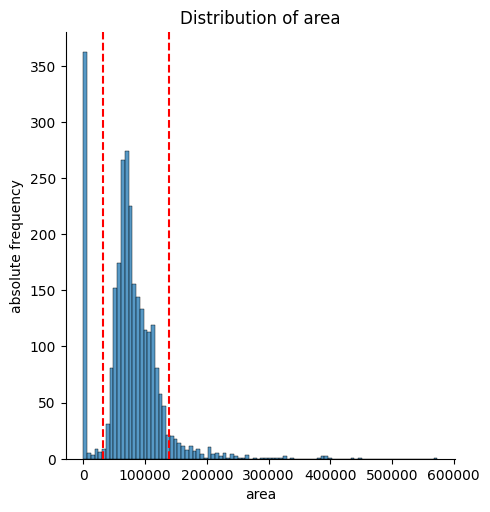

In [15]:
sns.displot(df.area)
plt.axvline(x=np.median(df.area) +  1.5*std_upper, color='r', linestyle='--')
plt.axvline(x=np.median(df.area) -  1.5*std_lower, color='r', linestyle='--')


plt.title('Distribution of area')
plt.xlabel('area')
plt.ylabel('absolute frequency')
plt.show()

In [16]:
df = df[(df.area >= (np.median(df.area) - 1.5 * std_lower)) & (df.area <= (np.median(df.area) +  1.5*std_upper))]

Text(5.069444444444445, 0.5, 'absolute frequency')

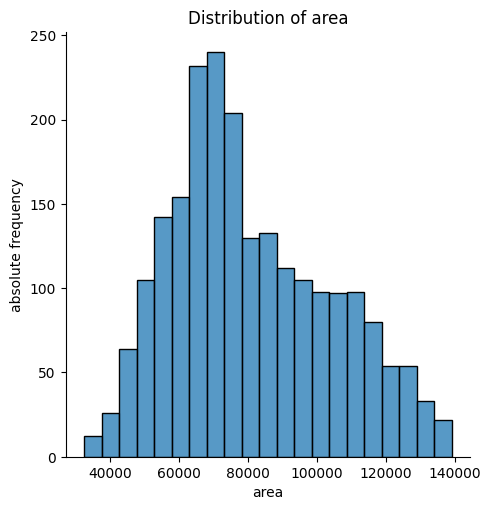

In [17]:
sns.displot(df.area)

plt.title('Distribution of area')
plt.xlabel('area')
plt.ylabel('absolute frequency')


Text(5.069444444444445, 0.5, 'absolute frequency')

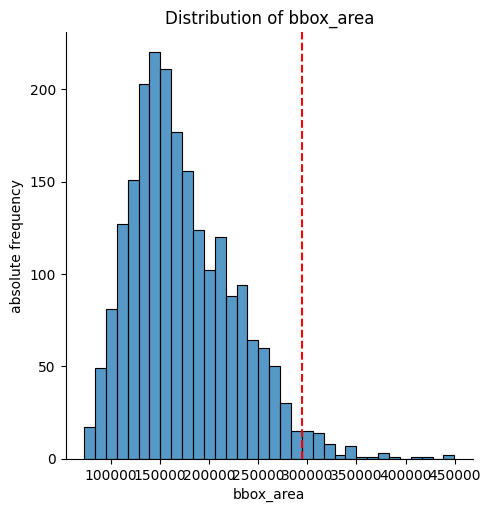

In [18]:
sns.displot(df.bbox_area)
plt.axvline(x=np.percentile(df.bbox_area, 97.5), color='r', linestyle='--')

plt.title('Distribution of bbox_area')
plt.xlabel('bbox_area')
plt.ylabel('absolute frequency')


In [19]:
df = df[df.bbox_area <= np.percentile(df.bbox_area, 97.5)]


Text(5.069444444444445, 0.5, 'absolute frequency')

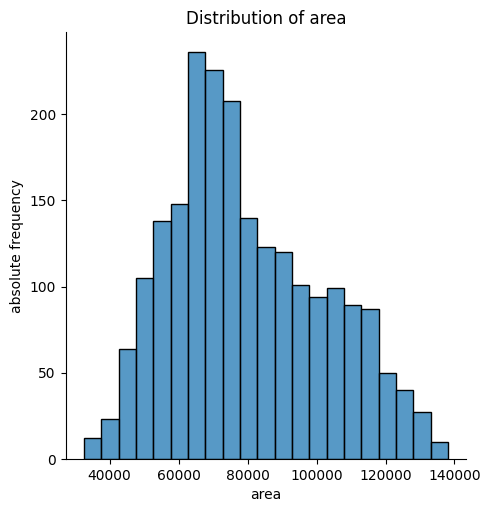

In [20]:
sns.displot(df.area)

plt.title('Distribution of area')
plt.xlabel('area')
plt.ylabel('absolute frequency')


In [21]:
image_features = ['image', 'slice', 'intensity_image', 'convex_image']
df_images = df[image_features + ['condition']]
df = df.drop(columns=image_features)
df_images.to_pickle('dataframe_images.pkl')
df.to_pickle('dataframe_no_images.pkl')

In [15]:
df = pd.read_pickle('dataframe_no_images.pkl')
df = df.reset_index(drop=True)

In [16]:
columns = df.columns[0:-1]
df[columns] = df[columns].apply(pd.to_numeric, errors='ignore')

In [17]:
columns = df.columns[0:-1]
df[columns] = df[columns].applymap(lambda x: x[0] if isinstance(x, np.ndarray) and len(x) > 0 else x)
#some entries are of dtype np.ndarray but only contain one value - extracting this value

In [18]:
cols = [col for col in df.columns if ('bbox' not in col and 'centroid' not in col and 'coords' not in col and 'label' not in col) or ('local' in col)]
df = df[cols]
#drop features with no biological relevance

In [19]:
df = df[~df.isin([np.inf, -np.inf]).any(axis=1)]
df
#remove nuclei with inf values (only 6 so just remove)

,convex_area,area,equivalent_diameter,euler_number,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-0,inertia_tensor-1-1,...,hc_foci_ratio_d2b_volume_variance,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,condition
0,80459.0,68655.0,50.803213,1,0.436487,1007.152803,11.856769,16.735201,11.856769,468.524956,...,276.906375,1.420051,0.422629,15.856740,126.183001,0.775033,0.418871,0.045590,0.024639,Control
1,117938.0,103843.0,58.316690,1,0.432506,1427.036885,-19.732723,14.967199,-19.732723,705.575234,...,708.550327,1.309075,0.345815,6.782616,18.327554,0.834898,0.612696,0.022565,0.016559,Control
2,84070.0,74386.0,52.179213,1,0.502533,1013.585194,-3.394704,-13.921009,-3.394704,584.339857,...,237.656999,1.679379,0.546700,10.778506,35.416110,1.040515,0.538220,0.045240,0.023401,Control
3,116423.0,107245.0,58.946697,1,0.529699,1235.360866,-5.646328,-0.039209,-5.646328,674.286941,...,388.656248,1.089928,0.472616,15.023550,62.564417,0.424401,0.138377,0.018452,0.006016,Control
4,79621.0,69394.0,50.984845,1,0.445948,1096.213391,11.034964,10.533926,11.034964,614.779906,...,44.762617,1.132951,0.213338,4.084063,8.854285,0.684881,0.182225,0.019024,0.005062,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,123529.0,110686.0,59.570515,1,0.485124,1401.030445,12.249500,-10.376748,12.249500,780.119720,...,288.545063,1.357163,0.327608,6.161395,26.585267,0.696295,0.298680,0.021100,0.009051,both_high
2136,65104.0,56800.0,47.692480,1,0.444960,868.211931,16.793364,2.802654,16.793364,487.066678,...,4198.748016,2.002595,0.290139,71.898463,792.872678,1.175291,0.382260,0.146911,0.047782,both_high
2137,81064.0,68815.0,50.842648,1,0.449742,1113.934297,7.780386,-12.219637,7.780386,534.858825,...,600.298634,1.042569,0.124432,6.013121,13.728555,0.593779,0.219361,0.020475,0.007564,both_high
2138,125223.0,112437.0,59.882999,1,0.472266,1431.249135,-11.486931,6.468942,-11.486931,753.159582,...,611.949724,1.148330,0.316498,5.106834,16.476682,0.642518,0.160152,0.016908,0.004215,both_high


In [20]:
from sklearn.impute import KNNImputer


#Drop fully empty features
df = df.dropna(axis=1, how='all')

condition = df['condition'].reset_index(drop=True)
features = df.drop(columns=['condition']).reset_index(drop=True)

imputer = KNNImputer(n_neighbors=5, keep_empty_features=True)
features_imputed = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

df_imputed = pd.concat([features_imputed, condition], axis=1, ignore_index=False)

print(features_imputed.shape, condition.shape)

(2138, 974) (2138,)


In [21]:
df_imputed.columns[df_imputed.isna().any()]

Index([], dtype='object')

In [22]:
df_imputed

,convex_area,area,equivalent_diameter,euler_number,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-0,inertia_tensor-1-1,...,hc_foci_ratio_d2b_volume_variance,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count,condition
0,80459.0,68655.0,50.803213,1.0,0.436487,1007.152803,11.856769,16.735201,11.856769,468.524956,...,276.906375,1.420051,0.422629,15.856740,126.183001,0.775033,0.418871,0.045590,0.024639,Control
1,117938.0,103843.0,58.316690,1.0,0.432506,1427.036885,-19.732723,14.967199,-19.732723,705.575234,...,708.550327,1.309075,0.345815,6.782616,18.327554,0.834898,0.612696,0.022565,0.016559,Control
2,84070.0,74386.0,52.179213,1.0,0.502533,1013.585194,-3.394704,-13.921009,-3.394704,584.339857,...,237.656999,1.679379,0.546700,10.778506,35.416110,1.040515,0.538220,0.045240,0.023401,Control
3,116423.0,107245.0,58.946697,1.0,0.529699,1235.360866,-5.646328,-0.039209,-5.646328,674.286941,...,388.656248,1.089928,0.472616,15.023550,62.564417,0.424401,0.138377,0.018452,0.006016,Control
4,79621.0,69394.0,50.984845,1.0,0.445948,1096.213391,11.034964,10.533926,11.034964,614.779906,...,44.762617,1.132951,0.213338,4.084063,8.854285,0.684881,0.182225,0.019024,0.005062,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,123529.0,110686.0,59.570515,1.0,0.485124,1401.030445,12.249500,-10.376748,12.249500,780.119720,...,288.545063,1.357163,0.327608,6.161395,26.585267,0.696295,0.298680,0.021100,0.009051,both_high
2134,65104.0,56800.0,47.692480,1.0,0.444960,868.211931,16.793364,2.802654,16.793364,487.066678,...,4198.748016,2.002595,0.290139,71.898463,792.872678,1.175291,0.382260,0.146911,0.047782,both_high
2135,81064.0,68815.0,50.842648,1.0,0.449742,1113.934297,7.780386,-12.219637,7.780386,534.858825,...,600.298634,1.042569,0.124432,6.013121,13.728555,0.593779,0.219361,0.020475,0.007564,both_high
2136,125223.0,112437.0,59.882999,1.0,0.472266,1431.249135,-11.486931,6.468942,-11.486931,753.159582,...,611.949724,1.148330,0.316498,5.106834,16.476682,0.642518,0.160152,0.016908,0.004215,both_high


In [23]:
df_imputed.to_pickle('dataframe_knn_imputed.pkl')

<h4> Random Forest Classifier </h4>

In [24]:
def plot_feature_importances(feature_importances):
    top20 = feature_importances['Feature Importance'].nlargest(20)
    plt.figure(figsize=(10, 6))
    plt.barh(top20.index, top20.values, align='center')
    plt.yticks(top20.index, top20.index)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Top 20 Feature Importances')
    plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
    plt.show()
    
def plot_confusion_matrix(cf):
    sns.heatmap(cf, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

def plot_accuracies(df_ac):
    plt.figure(figsize=(10, 6))
    plt.bar(df_ac['Model'], df_ac['Accuracy'])
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Accuracies for RFCs')
    plt.tight_layout()  
    plt.xticks(rotation=90)
    plt.show()

def all_possible_rfc(df, output_dir, kfold = 20, n_jobs = 96, compute_pairs=False, param_grid=None, n_estimators=1000):

    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import KFold
    from sklearn.metrics import confusion_matrix
    from sklearn.model_selection import GridSearchCV
    import numpy as np 
    import pandas as pd
    from os.path import join
    import itertools

    !mkdir -p $output_dir

    accuracies_df = pd.DataFrame()


    columns = df.columns[0:-1]
    X = df[columns].to_numpy()
    y = df.condition.to_numpy()

    model = RandomForestClassifier(criterion="entropy", n_estimators=n_estimators, n_jobs=n_jobs)

    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=kfold, n_jobs=n_jobs)
        grid_search.fit(X, y)
        best_params = grid_search.best_params_
        print("Best Parameters:", best_params)
        model = grid_search.best_estimator_

    kfold = KFold(n_splits=kfold, shuffle=True, random_state=42)  # Adjust the number of splits as needed
    accuracies = []
    train_acc = []
    feature_importances = np.zeros(X.shape[1])  # Initialize array to store feature importances
    confusion_matrices = []
    
    for train_index, test_index in kfold.split(X):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]
    
        model.fit(X_train, y_train)
        train_acc.append(model.score(X_train, y_train))
        
        # Evaluate the model
        accuracy = model.score(X_val, y_val)
        accuracies.append(accuracy)
        
        # Predict on validation set
        y_pred = model.predict(X_val)
        
        # Calculate confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)
        
        # Accumulate feature importances
        feature_importances += model.feature_importances_
    
    average_accuracy = np.mean(accuracies)
    avg_train_acc = np.mean(train_acc)
    accuracies_df = pd.concat([accuracies_df, pd.DataFrame({'Model': ['all'], 'Accuracy': [average_accuracy], 'Train-Accuracy': [avg_train_acc]})], ignore_index=True)
    print("Average Train Accuracy:", avg_train_acc)
    print("Average Accuracy:", average_accuracy)
    
    # Calculate average confusion matrix
    average_confusion_matrix = np.mean(confusion_matrices, axis=0)
    
    # Normalize the confusion matrix
    sum_true_positives = average_confusion_matrix.sum(axis=1, keepdims=True)
    normalized_confusion_matrix = average_confusion_matrix / sum_true_positives
    
    # Display normalized confusion matrix as DataFrame
    confusion_matrix_df = pd.DataFrame(normalized_confusion_matrix, columns=model.classes_, index=model.classes_)
    confusion_matrix_df.to_pickle(join(output_dir, 'confusion_matrix.pkl'))
    
    # Average feature importances across all folds
    average_feature_importances = feature_importances / kfold.n_splits
    
    # Create DataFrame for feature importances
    feature_importance_df = pd.DataFrame(average_feature_importances, columns=["Feature Importance"], index=columns)
    feature_importance_df.to_pickle(join(output_dir, 'feature_importance.pkl'))

    plot_feature_importances(feature_importance_df)
    plot_confusion_matrix(confusion_matrix_df)

    if compute_pairs:
        # Generate all possible combinations of pairs
        conditions = set(df.condition)
        pairs = set()
        for pair in itertools.combinations(conditions, 2):
            pairs.add(tuple(sorted(pair)))
        pairs = list(pairs)
       
        for pair in pairs:
            foldername = pair[0] + '-' + pair[1]
            foldername = join(output_dir, foldername)
            print(foldername)
            !mkdir -p $foldername
            df_curr = df[(df['condition'] == pair[0]) | (df['condition'] == pair[1])]
        
            X = df_curr[columns].to_numpy()
            y = df_curr.condition.to_numpy()
    
            accuracies = []
            train_acc = []
            feature_importances = np.zeros(X.shape[1])  # Initialize array to store feature importances
            confusion_matrices = []
            
            for train_index, test_index in kfold.split(X):
                X_train, X_val = X[train_index], X[test_index]
                y_train, y_val = y[train_index], y[test_index]
            
                model.fit(X_train, y_train)
                train_acc.append(model.score(X_train, y_train))
                
                # Evaluate the model
                accuracy = model.score(X_val, y_val)
                accuracies.append(accuracy)
                
                # Predict on validation set
                y_pred = model.predict(X_val)
                
                # Calculate confusion matrix
                cm = confusion_matrix(y_val, y_pred)
                confusion_matrices.append(cm)
                
                # Accumulate feature importances
                feature_importances += model.feature_importances_
            
            average_accuracy = np.mean(accuracies)
            avg_train_acc = np.mean(train_acc)
            accuracies_df = pd.concat([accuracies_df, pd.DataFrame({'Model': [foldername.rsplit('/')[-1]], 'Accuracy': [average_accuracy], 'Train-Accuracy': [avg_train_acc]})], ignore_index=True)
            print("Average Accuracy:", average_accuracy)
            
            # Calculate average confusion matrix
            average_confusion_matrix = np.mean(confusion_matrices, axis=0)
            
            # Normalize the confusion matrix
            sum_true_positives = average_confusion_matrix.sum(axis=1, keepdims=True)
            normalized_confusion_matrix = average_confusion_matrix / sum_true_positives
            
            # Display normalized confusion matrix as DataFrame
            confusion_matrix_df = pd.DataFrame(normalized_confusion_matrix, columns=model.classes_, index=model.classes_)
            confusion_matrix_df.to_pickle(join(foldername,'confusion_matrix.pkl'))
            
            # Average feature importances across all folds
            average_feature_importances = feature_importances / kfold.n_splits
            
            # Create DataFrame for feature importances
            feature_importance_df = pd.DataFrame(average_feature_importances, columns=["Feature Importance"], index=columns)
            feature_importance_df.to_pickle(join(foldername,'feature_importance.pkl'))
    
        plot_accuracies(accuracies_df)

    

Average Train Accuracy: 1.0
Average Accuracy: 0.6360562511020984


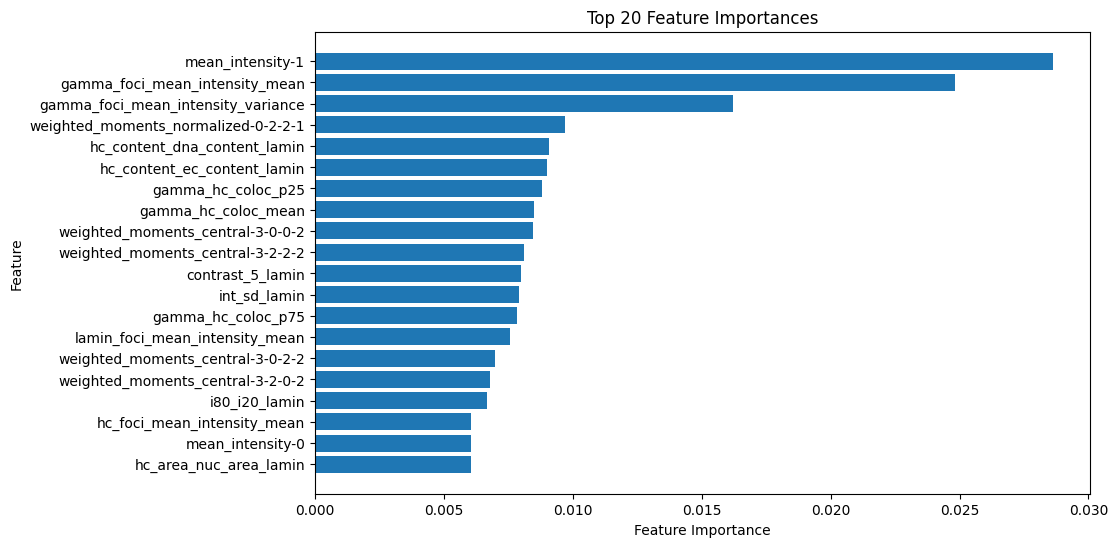

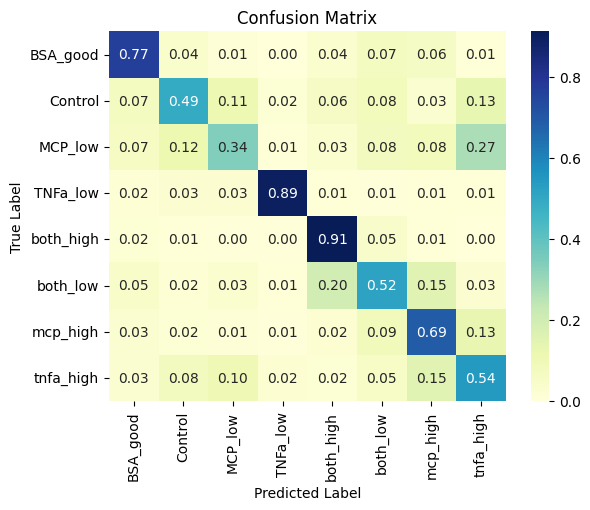

In [25]:
df = pd.read_pickle('dataframe_knn_imputed.pkl')
df = df.reset_index(drop=True)


all_possible_rfc(df, 'all_features', compute_pairs=False, n_jobs=96)

<h4>Scale dataset, low variance filtering, correlation filtering</h4>

In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your pandas DataFrame

df = pd.read_pickle('dataframe_knn_imputed.pkl')
df = df.reset_index(drop=True)

condition = df['condition'].reset_index(drop=True)
features = df.drop(columns=['condition']).reset_index(drop=True)

scaler = MinMaxScaler(feature_range=(0, 1))  # Scale features to range from 0 to 1
df_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Concatenate the condition column back to the normalized features DataFrame
#df_normalized = pd.concat([condition, df_normalized], axis=1)



In [27]:
df_normalized.describe()

,convex_area,area,equivalent_diameter,euler_number,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-0,inertia_tensor-1-1,...,hc_foci_ratio_d2b_volume_mean,hc_foci_ratio_d2b_volume_variance,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor_variance,hc_foci_ratio_nearest_neighbor_volume_mean,hc_foci_ratio_nearest_neighbor_volume_variance,hc_foci_d_nearest_neighbor(verts)_mean,hc_foci_d_nearest_neighbor(verts)_variance,hc_foci_ratio_nearest_neighbor(verts)_mean_count,hc_foci_ratio_nearest_neighbor(verts)_variance_count
count,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,...,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000,2138.000000
mean,0.424170,0.447854,0.544509,0.968651,0.679324,0.204428,0.665278,0.484800,0.665278,0.128832,...,0.037208,0.012809,0.169707,0.056321,0.010283,0.001766,0.154508,0.081879,0.021244,0.016019
std,0.198154,0.210503,0.201686,0.054495,0.100114,0.093267,0.105272,0.093372,0.105272,0.061504,...,0.056246,0.043801,0.100195,0.035925,0.038908,0.023432,0.073219,0.062539,0.046907,0.032900
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.278277,0.296023,0.406393,0.975610,0.621453,0.136721,0.596164,0.422340,0.596164,0.085116,...,0.007934,0.000558,0.107536,0.036948,0.002679,0.000051,0.112875,0.043507,0.007255,0.005015
50%,0.386495,0.404897,0.521168,0.975610,0.683706,0.195791,0.663273,0.482897,0.663273,0.121815,...,0.022951,0.003170,0.149320,0.049095,0.004643,0.000130,0.141958,0.067847,0.011975,0.009085
75%,0.566746,0.603729,0.703669,0.975610,0.746230,0.264807,0.739098,0.544702,0.739098,0.163925,...,0.046603,0.010568,0.200996,0.067212,0.008302,0.000381,0.178369,0.102177,0.020823,0.016829
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Assuming df_normalized is your DataFrame

# Initialize VarianceThreshold with threshold 0.005
selector = VarianceThreshold(threshold=0.005)

# Fit the selector to your data
selector.fit(df_normalized)

# Get boolean mask of features selected
selected_features_mask = selector.get_support()

# Get the names of removed features
removed_features = df_normalized.columns[~selected_features_mask]

# Remove the low variance features from the DataFrame
df_filtered = df_normalized.loc[:, selected_features_mask]

# Print the removed features
print("Removed features:")
print(removed_features, len(removed_features))


Removed features:
Index(['euler_number', 'inertia_tensor-1-1', 'inertia_tensor-1-2',
       'inertia_tensor-2-1', 'inertia_tensor_eigvals-1', 'max_intensity-0',
       'max_intensity-1', 'max_intensity-2', 'min_intensity-1',
       'moments_central-0-0-3',
       ...
       'hc_foci_volume_variance', 'hc_foci_mean_intensity_variance',
       'hc_foci_ratio_d2b_volume_mean', 'hc_foci_ratio_d2b_volume_variance',
       'hc_foci_d_nearest_neighbor_variance',
       'hc_foci_ratio_nearest_neighbor_volume_mean',
       'hc_foci_ratio_nearest_neighbor_volume_variance',
       'hc_foci_d_nearest_neighbor(verts)_variance',
       'hc_foci_ratio_nearest_neighbor(verts)_mean_count',
       'hc_foci_ratio_nearest_neighbor(verts)_variance_count'],
      dtype='object', length=472) 472


In [29]:
df_filtered = pd.concat([df_filtered, condition], axis=1)
df_filtered

,convex_area,area,equivalent_diameter,extent,inertia_tensor-0-0,inertia_tensor-0-1,inertia_tensor-0-2,inertia_tensor-1-0,inertia_tensor-2-0,inertia_tensor-2-2,...,lamin_hole_d_nearest_neighbor(verts)_variance,lamin_hole_ratio_nearest_neighbor(verts)_mean_count,lamin_hole_ratio_nearest_neighbor(verts)_variance_count,hc_foci_count,hc_foci_mean_intensity_mean,hc_foci_d2b_mean,hc_foci_d2b_variance,hc_foci_d_nearest_neighbor_mean,hc_foci_d_nearest_neighbor(verts)_mean,condition
0,0.339123,0.342036,0.456457,0.591878,0.163621,0.774256,0.619094,0.774256,0.619094,0.226192,...,0.000000,0.050605,0.000000,0.229730,0.407001,0.110512,0.028272,0.175997,0.165366,Control
1,0.640072,0.675136,0.762670,0.581826,0.331457,0.472537,0.604795,0.472537,0.604795,0.352660,...,0.030737,0.010391,0.006147,0.500000,0.269412,0.235112,0.155744,0.142407,0.180479,Control
2,0.368118,0.396287,0.512536,0.758659,0.166192,0.628585,0.371154,0.628585,0.371154,0.152324,...,0.000000,0.195331,0.000000,0.310811,0.264226,0.082787,0.026791,0.254489,0.232389,Control
3,0.627907,0.707340,0.788346,0.827257,0.254840,0.607080,0.483427,0.607080,0.483427,0.246965,...,0.152762,0.091251,0.114571,0.310811,0.373033,0.140334,0.077043,0.076076,0.076847,Control
4,0.332394,0.349032,0.463859,0.615770,0.199220,0.766407,0.568940,0.766407,0.568940,0.184559,...,0.000000,0.187124,0.000000,0.486486,0.356682,0.063969,0.020846,0.089099,0.142607,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2133,0.684967,0.739914,0.813770,0.714698,0.321062,0.778007,0.399820,0.778007,0.399820,0.286538,...,0.175774,0.050918,0.087887,0.445946,0.364142,0.174359,0.060299,0.156962,0.145488,both_high
2134,0.215825,0.229813,0.329679,0.613274,0.108083,0.821406,0.506411,0.821406,0.506411,0.116409,...,0.451653,0.109719,0.338739,0.108108,0.490479,0.192614,0.151368,0.352319,0.266414,both_high
2135,0.343981,0.343551,0.458064,0.625350,0.206304,0.735321,0.384915,0.735321,0.384915,0.250704,...,0.052205,0.035119,0.026102,0.391892,0.295226,0.187844,0.183273,0.061742,0.119607,both_high
2136,0.698569,0.756489,0.826505,0.682227,0.333141,0.551295,0.536063,0.551295,0.536063,0.324207,...,0.162856,0.058561,0.069796,0.513514,0.341106,0.237171,0.157309,0.093754,0.131912,both_high


Average Train Accuracy: 1.0
Average Accuracy: 0.6220772350555459


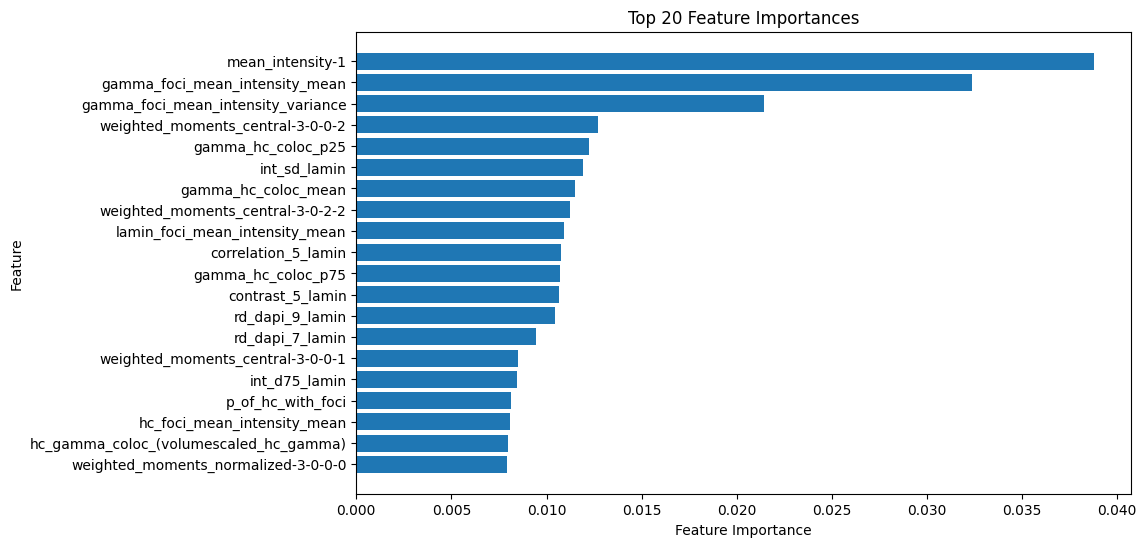

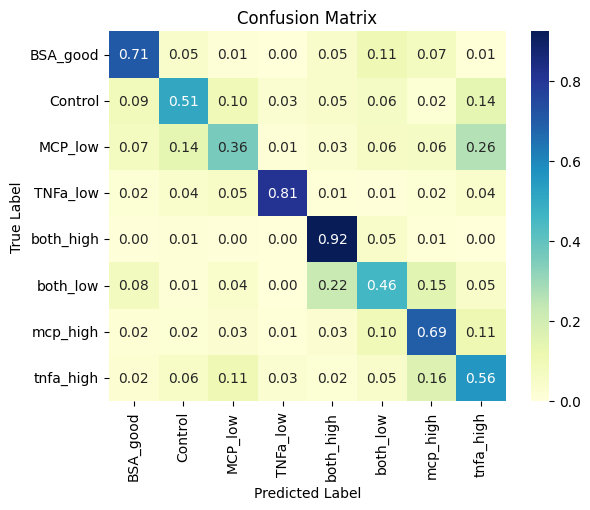

In [30]:
all_possible_rfc(df_filtered, 'all_features', compute_pairs=False, n_jobs=96)

In [31]:
#https://www.kaggle.com/code/oldwine357/removing-highly-correlated-features/notebook

def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)
    print('Removed Columns {}'.format(drops))
    return (x,drops)

In [32]:
df_dropped, drops = remove_collinear_features(df_normalized,0.80)

Removed Columns {'weighted_moments-2-1-3-1', 'weighted_moments_normalized-1-0-3-0', 'weighted_moments_central-3-2-0-0', 'asm_20_lamin', 'weighted_moments-0-3-1-2', 'weighted_moments_central-3-2-3-2', 'moments-2-0-2', 'weighted_local_centroid-0-2', 'moments_normalized-3-2-1', 'weighted_moments-0-1-0-2', 'weighted_moments_central-0-0-2-0', 'weighted_moments_central-0-3-1-1', 'moments_normalized-0-2-1', 'weighted_moments_central-1-1-0-0', 'weighted_moments_normalized-0-3-3-2', 'moments-0-0-1', 'moments-2-2-0', 'weighted_moments_central-2-2-0-1', 'weighted_moments_normalized-1-2-0-0', 'rd_foci_4', 'weighted_moments_normalized-3-1-0-1', 'weighted_moments_normalized-2-3-3-2', 'weighted_moments_normalized-1-1-3-0', 'energy_20', 'weighted_moments_central-2-0-1-0', 'gamma_foci_volume_variance', 'gamma_foci_ratio_nearest_neighbor(verts)_variance_count', 'gamma_foci_d2b_variance', 'int_sd', 'weighted_moments_normalized-3-1-2-1', 'gamma_foci_ratio_d2b_volume_variance', 'moments-3-0-1', 'i80_i20', 

In [33]:
print(len(drops))
df_dropped = pd.concat([df_dropped, condition], axis=1)
df_dropped.to_pickle('dataframe_dropped.pkl')

803


Average Train Accuracy: 1.0
Average Accuracy: 0.6285928407688239


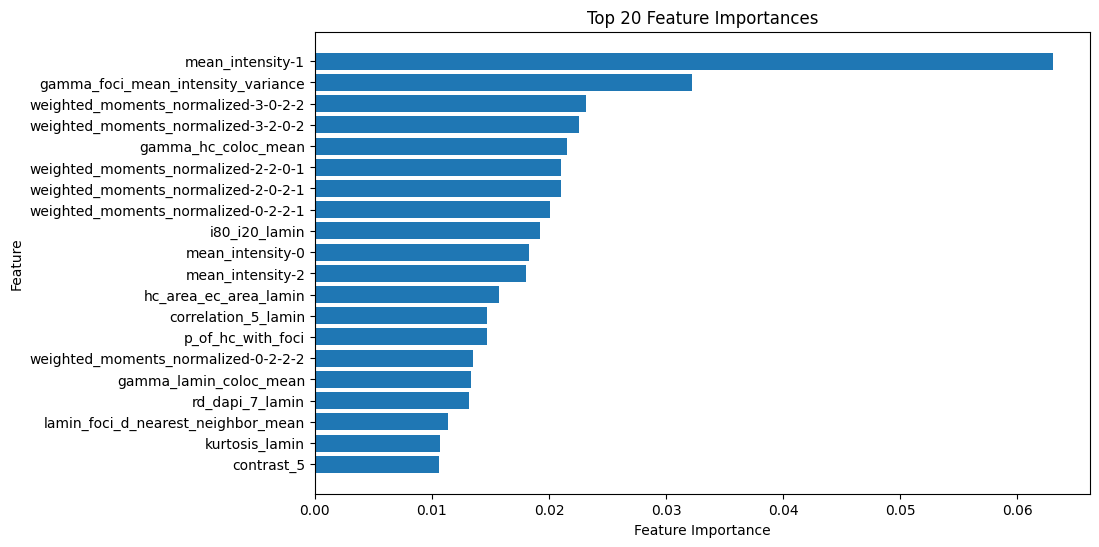

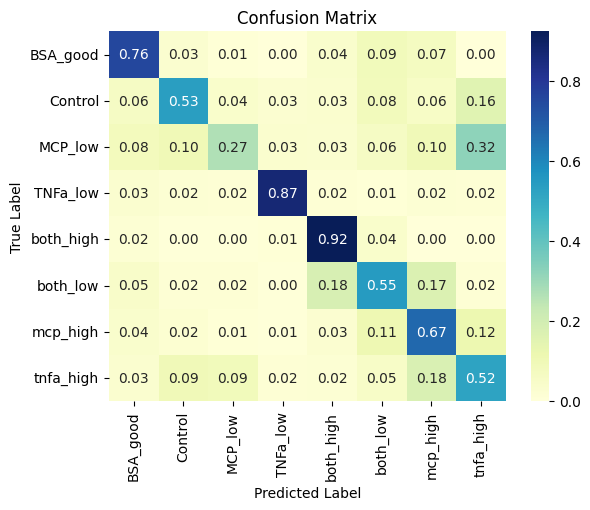

In [34]:
all_possible_rfc(df_dropped, 'all_features', compute_pairs=False, n_jobs=96)

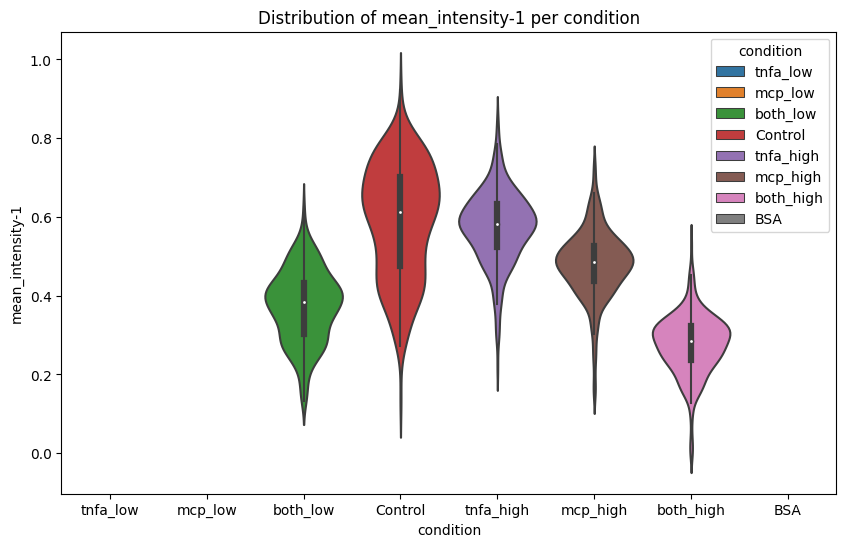

In [35]:
df = df_dropped
plt.figure(figsize=(10,6))
df['condition'] = pd.Categorical(df['condition'], categories=['tnfa_low', 'mcp_low', 'both_low', 'Control', 'tnfa_high', 'mcp_high', 'both_high', 'BSA_good'])
sns.violinplot(data=df, x='condition', y='mean_intensity-1', hue='condition', dodge=False)
plt.title('Distribution of mean_intensity-1 per condition')
plt.show()

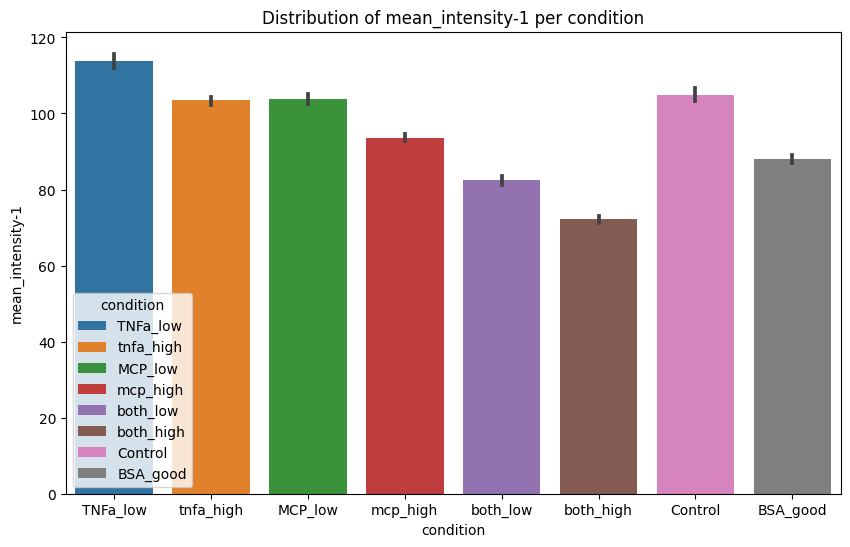

In [6]:
df = pd.read_pickle('dataframe_knn_imputed.pkl')
plt.figure(figsize=(10,6))
df['condition'] = pd.Categorical(df['condition'], categories=['TNFa_low', 'tnfa_high','MCP_low', 'mcp_high','both_low',  'both_high','Control',   'BSA_good'])
sns.barplot(data=df, x='condition', y='mean_intensity-1', hue='condition', dodge=False)
plt.title('Distribution of mean_intensity-1 per condition')
plt.show()

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt